## Тестовое задание на должность продуктового аналитика (junior)
##### Исполнитель: Сасимович Игорь (e-mail: ihar.sasimovich@gmail.com ; telegram: http://t.me/ihar367)
### Задание 1

Вы работаете junior аналитиком в компании, создающей мобильные игры. Вам необходимо проанализировать данные, содержащие информацию об игроке, - его уровень, страна, платформа, дата регистрации и дата login’a. Эти данные помогут сформулировать представление об аудитории игры.

Таблица содержит следующие столбцы:
- сountry - страна,
- pl - уровень игрока,
- plf - платформа, 
- reg - дата регистрации игрока, 
- ts - время последнего захода игрока в игру, 
- user - id игрока.

#### Вопросы:
1. Для каждой платформы определите топ 5 стран по количеству игроков. 
2. Какой максимальный lifetime у игроков в игре?
3. Какое количество игроков находится выше 20 уровня? 
4. Посчитайте средний уровень игроков для каждой страны.

#### Как выполнять задание:
- Результаты можете предоставить в виде тетрадки Jupyter Notebook (предпочтительно) или в Google spreadsheets (для каждого вопроса отдельный лист).
- Опишите короткий вывод по каждому решению.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

sns.set(rc={'figure.figsize':(12,6)})

In [2]:
url = 'https://docs.google.com/spreadsheets/d/1bb0mBd9OGSdH08POkWgcYlK9a2YPQq1Dd2XyikUdeeI/edit#gid=1478114822'

In [3]:
url = url.replace('/edit#gid=', '/export?format=csv&gid=')

In [4]:
df = pd.read_csv(url)

In [5]:
df.head()

,country,pl,plf,reg,ts,user
0,IT,33,Android,1511191920859,1586044805457,1122239prod-eu
1,IN,33,Android,1509074590554,1586045807421,147065prod-us
2,TR,33,iOS,1575420775882,1586047059117,25564086prod-eu
3,HK,12,Android,1584406076183,1586045087568,10123050prod-as
4,CN,21,Android,1581887511291,1586046421744,9893956prod-as


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   country  1000 non-null   object
 1   pl       1000 non-null   int64 
 2   plf      1000 non-null   object
 3   reg      1000 non-null   int64 
 4   ts       1000 non-null   int64 
 5   user     1000 non-null   object
dtypes: int64(3), object(3)
memory usage: 47.0+ KB


In [7]:
df['ts'] = pd.to_datetime(df['ts'], unit='ms')
df['reg'] = pd.to_datetime(df['reg'], unit='ms')
df.head()

,country,pl,plf,reg,ts,user
0,IT,33,Android,2017-11-20 15:32:00.859,2020-04-05 00:00:05.457,1122239prod-eu
1,IN,33,Android,2017-10-27 03:23:10.554,2020-04-05 00:16:47.421,147065prod-us
2,TR,33,iOS,2019-12-04 00:52:55.882,2020-04-05 00:37:39.117,25564086prod-eu
3,HK,12,Android,2020-03-17 00:47:56.183,2020-04-05 00:04:47.568,10123050prod-as
4,CN,21,Android,2020-02-16 21:11:51.291,2020-04-05 00:27:01.744,9893956prod-as


In [8]:
# Посмотрим на количество уникальных значений по колонкам
print(
"Количество уникальных значений в колонке ", '\n',
"* country: ", df.country.nunique(), '\n',
"* plf: ", df.plf.nunique(), '\n',
"* user: ", df.user.nunique(), '\n',
sep = ''
)

Количество уникальных значений в колонке 
* country: 102
* plf: 4
* user: 1000



In [9]:
df.describe()
# Максимальный уровень 33, половина юзеров не достигла 10 уровня.

,pl
count,1000.000000
mean,13.080000
std,10.090859
min,1.000000
25%,4.000000
50%,10.000000
75%,20.250000
max,33.000000


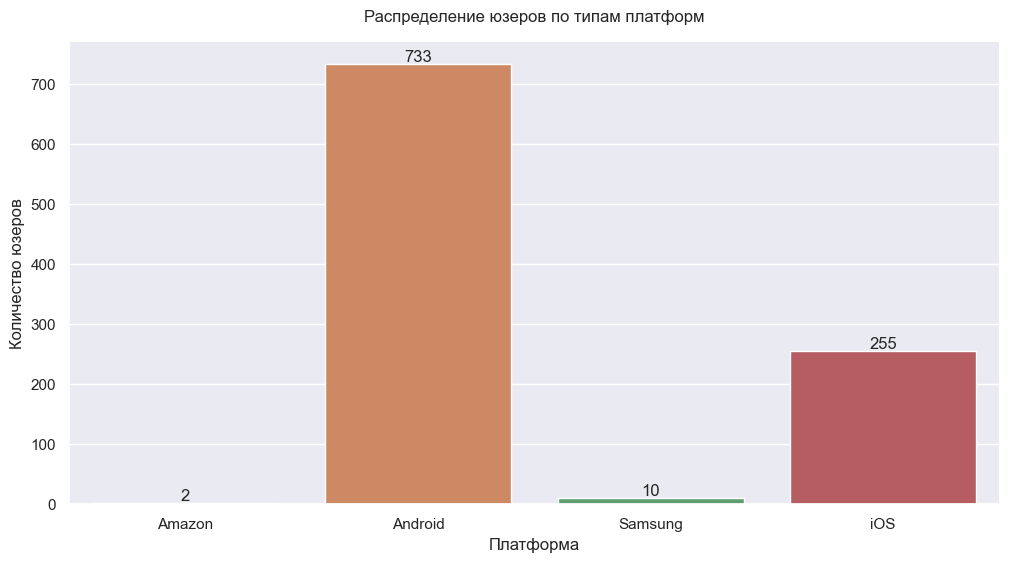

In [10]:
# Посмотрим на распределение данных по серверам и типам порталов
zzz = df.groupby('plf', as_index= False).agg({'user': 'count'})
ax = sns.barplot(x='plf', y='user', data=zzz)
ax.set(xlabel='Платформа', ylabel='Количество юзеров')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
sns.despine()
plt.title('Распределение юзеров по типам платформ',  pad=15)
plt.show() 

#### 1. Для каждой платформы определите топ 5 стран по количеству игроков.

In [11]:
top_5_countries = df.groupby(['plf', 'country'], as_index= False) \
                    .agg({'user': 'count'}) \
                    .rename(columns={'user': 'number_of_users'}) \
                    .sort_values(['plf', 'number_of_users'], ascending=False)
top_5_countries

,plf,country,number_of_users
115,iOS,CN,122
152,iOS,VN,18
151,iOS,US,14
141,iOS,RU,12
123,iOS,IN,11
...,...,...,...
95,Android,XK,1
96,Android,YE,1
98,Android,ZM,1
0,Amazon,CI,1


In [12]:
top_5_countries.groupby('plf').head()

,plf,country,number_of_users
115,iOS,CN,122
152,iOS,VN,18
151,iOS,US,14
141,iOS,RU,12
123,iOS,IN,11
101,Samsung,EG,3
99,Samsung,BR,1
100,Samsung,CR,1
102,Samsung,IL,1
103,Samsung,IN,1


#### Вывод:
- Самые популярные платформы - Android и iOS. 
- Наибольшее количество игроков, предпочитающих платфому Android, находится в странах: Индия, Россия, Китай, Индонезия, Филиппины.
- Наибольшее количество игроков, предпочитающих платфому IOS, находится в странах: Китай, Вьетнам, США, Россия, Индия.

#### 2. Какой максимальный lifetime у игроков в игре?

In [13]:
df['lifetime_days'] = ((df['ts'] - df['reg']) / pd.Timedelta(days=1)).round()
df['lifetime_days'].max()

891.0

In [14]:
lifetime = df.groupby('lifetime_days', as_index=False) \
                   .agg({'user': 'count'}) \
                   .rename(columns={'user': 'number_of_users'}) \
                   .sort_values('lifetime_days', ascending=False)
lifetime

,lifetime_days,number_of_users
334,891.0,1
333,890.0,1
332,871.0,1
331,870.0,1
330,869.0,5
...,...,...
4,4.0,19
3,3.0,34
2,2.0,36
1,1.0,81


<Axes: xlabel='lifetime_days', ylabel='number_of_users'>

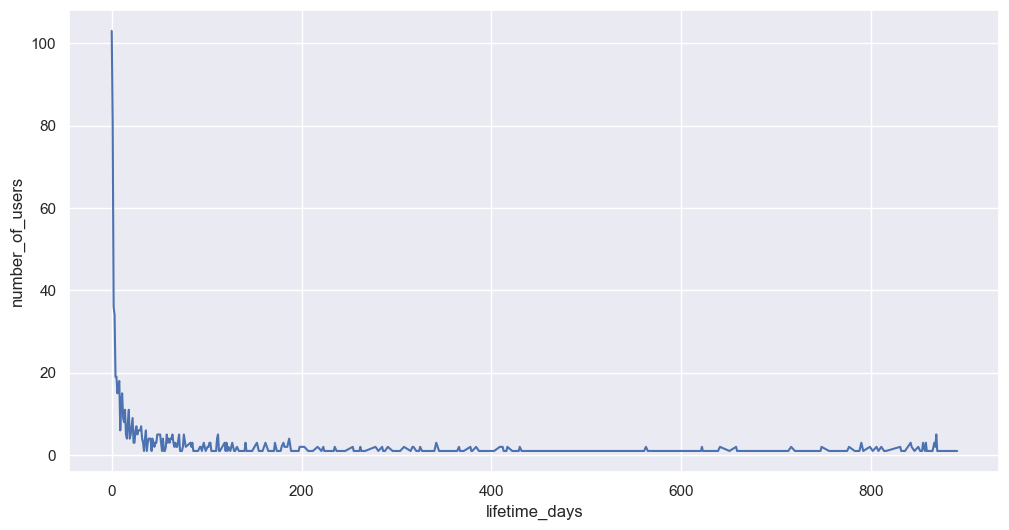

In [15]:
sns.lineplot(x = 'lifetime_days', y = 'number_of_users', data=lifetime)

#### Вывод:
- Максимальный lifetime у игроков не превышает 891 день.
- Самый большой отток (Churn) происходит в первые дни.

#### 3. Какое количество игроков находится выше 20 уровня?

In [16]:
df[df['pl'] > 20].user.nunique()

# df.query('pl > 20').shape[0]

250

#### Вывод:
В выборке 1000 игроков, ровно четверть выше 20 уровня.

#### 4. Посчитайте средний уровень игроков для каждой страны.

In [17]:
# Создадим список стран, в которых игроков 10 и больше. Остальные страны исключим из расчета.
cntrs = df.groupby('country', as_index=False) \
              .agg({'user': 'count'}) \
              .query('user >= 10') \
              .sort_values('user', ascending=False)

In [18]:
countries = cntrs.country.to_list()

In [19]:
new_df = df[df['country'].isin(countries)]
new_df.head()

,country,pl,plf,reg,ts,user,lifetime_days
1,IN,33,Android,2017-10-27 03:23:10.554,2020-04-05 00:16:47.421,147065prod-us,891.0
2,TR,33,iOS,2019-12-04 00:52:55.882,2020-04-05 00:37:39.117,25564086prod-eu,123.0
3,HK,12,Android,2020-03-17 00:47:56.183,2020-04-05 00:04:47.568,10123050prod-as,19.0
4,CN,21,Android,2020-02-16 21:11:51.291,2020-04-05 00:27:01.744,9893956prod-as,48.0
5,IN,20,iOS,2020-03-04 19:30:53.973,2020-04-05 08:07:24.409,24472040prod-in,32.0


In [20]:
mean_pl = new_df.groupby('country', as_index=False) \
                .agg({'pl': 'mean'}) \
                .rename(columns={'pl': 'mean_pl'}) \
                .sort_values('mean_pl', ascending=False)\
                .round(1)\
                .reset_index(drop=True)
mean_pl

,country,mean_pl
0,HK,20.4
1,DE,20.1
2,VN,17.0
3,TH,15.0
4,CN,14.8
5,TR,14.7
6,MY,14.7
7,RU,14.1
8,UZ,13.5
9,ID,13.3


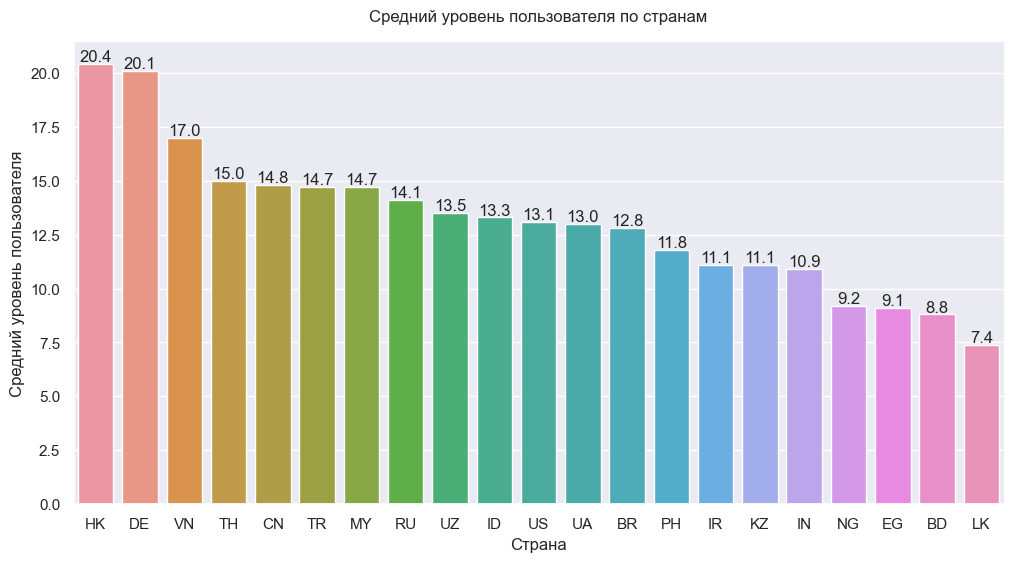

In [21]:
ax = sns.barplot(x='country', y='mean_pl', data=mean_pl)
ax.set(xlabel='Страна', ylabel='Средний уровень пользователя')

for p in ax.patches:
    ax.annotate(round(p.get_height(), 2), (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

sns.despine()
plt.title('Средний уровень пользователя по странам', pad=15)
plt.show()

In [22]:
mean_pl.describe()

,mean_pl
count,21.000000
mean,13.138095
std,3.369789
min,7.400000
25%,11.100000
50%,13.100000
75%,14.700000
max,20.400000


#### Вывод:
- При расчете среднего уровня пользователя я не учитывал страны, в которых меньше 10 игроков, чтобы они не смазывали общую картину. После исключения осталась 21 страна.
- Средний уровень по всем странам - 13.1. Минимальный - у Шри-Ланки (7.4), максимальный - у Гонконга (20.4)

### Задание 2
Вы попали на аналитическую конференцию. В ней приняли участие 80 специалистов: 40 продуктовых аналитиков и 40 ML-инженеров. 30 продуктовых аналитиков и 20 ML-инженеров пойдут на лекцию, посвященную архитектуре баз данных. Известно, что случайно выбранный продуктовый аналитик пойдет на лекцию по архитектуре баз данных с вероятностью 75%. Какова вероятность того, что случайно выбранный посетитель лекции, посвященной архитектуре баз данных, окажется ML-инженером? 

#### Решение:
Применим формулу `p = n/m` , где:

m = 30 + 20 = 50 - всего посетителей лекции по архитектуре БД  

n = 20 - количество ML-инженеров, посетивших лекцию  

p = 20/50 = 0.4 или 40%

#### Ответ: 
40 % - вероятность того, что случайно выбранный посетитель лекции, посвященной архитектуре баз данных, окажется ML-инженером

### Задание 3
Есть поверье, что если спортсмен побывал на обложке  “Sports illustrated”, то вскоре после этого с этим спортсменом случается спортивная неудача или снижение спортивного результата. Одной жертвой “проклятья”  в 2000 году стал русский гимнаст Иван Иванков, которого назвали лучшим спорстменом мира, после чего он не смог даже отобраться на летние Олимпийские игры.
Действительно “Sports illustrated” является носителем проклятья или это можно объяснить каким-либо феноменом?

#### Ответ:
После достижения выдающихся  успехов спортсмены часто оказываются на обложке "Sports Illustrated". Однако, со временем, пройдя пик физической формы, их результаты склонны приближаться к средним значениям. Это явление называется "регрессией к среднему" или "возвращением к среднему". Суть его заключается в том, что если спортивное достижение является экстремальным (выше или ниже среднего), то будущие достижения обычно будут ближе к среднему долгосрочному уровню.